ニュースデータのマクロ分析
- 文字の前処理
- 時間の前処理


- 参考
https://github.com/takechanman1228/w2f-analysis/blob/master/macro-analysis-by-currency.ipynb

In [30]:
%matplotlib inline
import pickle
import pandas as pd
import seaborn as sns

In [1]:
with open('df_content_list.pickle', mode='rb') as f:
    news_df = pickle.load(f)
news_df.columns = ["datetime","title","content"]

In [2]:
len(news_df)

11948

In [3]:
news_df.head()

,datetime,title,content
0,"Sep 14, 2017 03:37AM ET",Forex - Dollar Steady against Other Majors Ahe...,\n\n\n© Reuters. Dollar steady ahead of U.S. ...
1,"Sep 13, 2017 01:23PM ET","Forex - Dollar at Highs, Shrugs off Weak Whole...",\n\n\n© Reuters. The dollar rose to session h...
2,"Sep 13, 2017 10:52AM ET",Forex - Dollar Turns Broadly Higher on U.S. Ta...,\n\n\n© Reuters. Dollar bounces back as focus...
3,"Sep 13, 2017 09:05AM ET",Forex - Dollar Little Changed after U.S. PPI Data,\n\n\n© Reuters. Dollar holds steady against ...
4,"Sep 13, 2017 08:31AM ET",U.S. Producer Prices Rise Less than Expected i...,\n\n\nU.S. PPI increases 0.2% in August vs. fo...


In [4]:
news_df.tail()

,datetime,title,content
11943,"Feb 21, 2013 04:48AM ET",Forex - EUR/USD pushes lower on downbeat E.Z. ...,\n\n\n\n\n\n\n Investing.com - The euro pus...
11944,"Feb 21, 2013 04:03AM ET",Euro zone manufacturing PMI falls to 47.8 in F...,\n\n\n\n\n\n\n Investing.com - Manufacturin...
11945,"Feb 21, 2013 03:47AM ET","Forex - EUR/USD extends losses after French, G...",\n\n Investing.com - The euro extended loss...
11946,"Feb 21, 2013 03:33AM ET",German manufacturing PMI improves to 50.1,\n\n\n\n\n\n\n Investing.com - Manufacturin...
11947,"Feb 21, 2013 03:02AM ET",French manufacturing PMI rises to 43.6 in Febr...,\n\n\n\n\n\n\n Investing.com - Manufacturin...


In [5]:
# 前処理
# \n , copyrightmark, sponsoredArticle
news_df["content"][0]

"\n\n\n© Reuters.  Dollar steady ahead of U.S. inflation data\n\n\n\nInvesting.com - The dollar was steady against a basket of the other major currencies on Thursday as investor’s awaited data on U.S. consumer inflation later in the day for fresh indications on whether the Federal Reserve will hike rates again this year.\nThe U.S. dollar index, which measures the greenback’s strength against a trade-weighted basket of six major currencies, was at 91.39 by 03:21 AM ET (07:21 GMT).\nThe index has risen 1.14% so far this week, rebounding from last week’s more than two-year lows amid a relief rally spurred by diminished worries over North Korea’s nuclear program and the economic impact of Hurricane Irma.\nFresh hopes for the Trump's administrations plans for a tax overhaul helped support the dollar on Wednesday.\nMeanwhile, data on Wednesday showed that while U.S. producer prices rose slightly in August inflation pressures remained tepid, a potential obstacle to the Fed’s plans to raise in

In [6]:
# to lower case
aaa=news_df["content"].str.lower()
bbb=aaa.str.replace(r'sponsoredarticle.+\n', '')
ccc=bbb.str.replace('[\xA9]\s\S+', '')
ddd=ccc.str.replace('\n', ' ')
#TODO:stopword

In [7]:
ddd[0]

"     dollar steady ahead of u.s. inflation data    investing.com - the dollar was steady against a basket of the other major currencies on thursday as investor’s awaited data on u.s. consumer inflation later in the day for fresh indications on whether the federal reserve will hike rates again this year. the u.s. dollar index, which measures the greenback’s strength against a trade-weighted basket of six major currencies, was at 91.39 by 03:21 am et (07:21 gmt). the index has risen 1.14% so far this week, rebounding from last week’s more than two-year lows amid a relief rally spurred by diminished worries over north korea’s nuclear program and the economic impact of hurricane irma. fresh hopes for the trump's administrations plans for a tax overhaul helped support the dollar on wednesday. meanwhile, data on wednesday showed that while u.s. producer prices rose slightly in august inflation pressures remained tepid, a potential obstacle to the fed’s plans to raise interest rates. the rep

In [9]:
news_df["content"]=ddd
news_df.head()

,datetime,title,content
0,"Sep 14, 2017 03:37AM ET",Forex - Dollar Steady against Other Majors Ahe...,dollar steady ahead of u.s. inflation dat...
1,"Sep 13, 2017 01:23PM ET","Forex - Dollar at Highs, Shrugs off Weak Whole...",the dollar rose to session highs on wedne...
2,"Sep 13, 2017 10:52AM ET",Forex - Dollar Turns Broadly Higher on U.S. Ta...,dollar bounces back as focus turns to u.s...
3,"Sep 13, 2017 09:05AM ET",Forex - Dollar Little Changed after U.S. PPI Data,dollar holds steady against currency bask...
4,"Sep 13, 2017 08:31AM ET",U.S. Producer Prices Rise Less than Expected i...,u.s. ppi increases 0.2% in august vs. forec...


In [13]:
news_df["datetime"]=pd.to_datetime(news_df["datetime"])

In [14]:
news_df_sort_by_time=news_df.sort_values(by="datetime")

In [25]:
news_df_during_period = news_df_sort_by_time
# TODO あとで調節
# news_df_during_period=news_df_sort_by_time[(news_df_sort_by_time['datetime']>"2013-01-01 00:00:00") & (news_df_sort_by_time['datetime']<"2015-12-31 00:00:00")]

In [26]:
news_df_during_period["date_year"]=news_df_during_period.apply(lambda x: x['datetime'].year, axis=1)
news_df_during_period["date_month"]=news_df_during_period.apply(lambda x: x['datetime'].month, axis=1)
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.dayofweek.html
# weekは52週の何週目か
news_df_during_period["date_week"]=news_df_during_period.apply(lambda x: x['datetime'].dayofweek, axis=1)
news_df_during_period["date_day"]=news_df_during_period.apply(lambda x: x['datetime'].day, axis=1)
news_df_during_period["date_hour"]=news_df_during_period.apply(lambda x: x['datetime'].hour, axis=1)
news_df_during_period["date_min"]=news_df_during_period.apply(lambda x: x['datetime'].minute, axis=1)

In [23]:
news_df_during_period.head()

,datetime,title,content,date_year,date_month,date_week,date_day,date_hour,date_min
11947,2013-02-21 03:02:00,French manufacturing PMI rises to 43.6 in Febr...,investing.com - manufacturing activ...,2013,2,8,21,3,2
11946,2013-02-21 03:33:00,German manufacturing PMI improves to 50.1,investing.com - manufacturing activ...,2013,2,8,21,3,33
11945,2013-02-21 03:47:00,"Forex - EUR/USD extends losses after French, G...",investing.com - the euro extended losses...,2013,2,8,21,3,47
11944,2013-02-21 04:03:00,Euro zone manufacturing PMI falls to 47.8 in F...,investing.com - manufacturing activ...,2013,2,8,21,4,3
11943,2013-02-21 04:48:00,Forex - EUR/USD pushes lower on downbeat E.Z. ...,investing.com - the euro pushed low...,2013,2,8,21,4,48


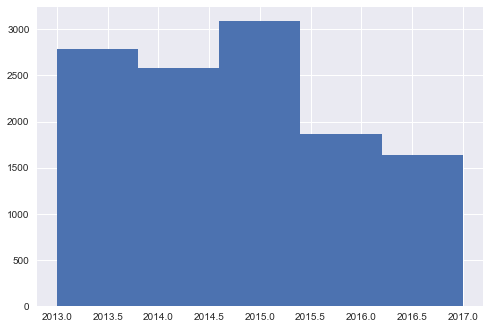

In [34]:
news_df_during_period["date_year"].hist(bins=5)

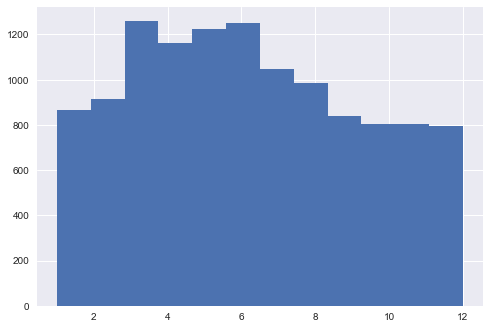

In [37]:
news_df_during_period["date_month"].hist(bins=12)

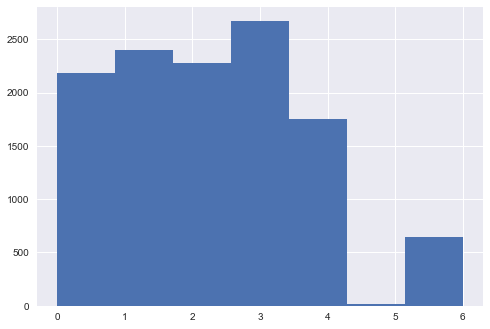

In [38]:
news_df_during_period["date_week"].hist(bins=7)

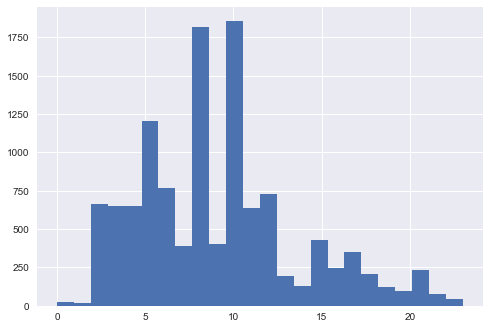

In [41]:
news_df_during_period["date_hour"].hist(bins=24)

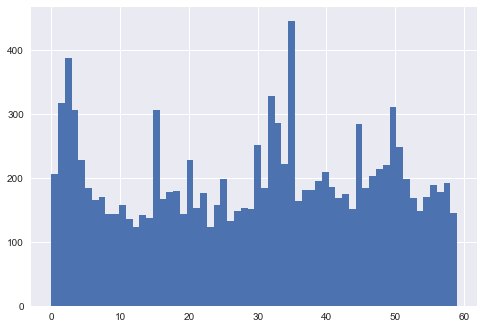

In [42]:
news_df_during_period["date_min"].hist(bins=60)
# 時間がかたまっていないのでよさそう

In [44]:
with open('news_df.pickle', mode='wb') as f:
    pickle.dump(news_df_during_period, f)